#**Task 2 of Mini Project: Text Classification using Deep Learning**

---



##**1. Data Loading**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_csv('/content/md.csv')
data.head()

,mre,Category
0,"""The patient was diagnosed with Type 2 diabete...",Diagnosis
1,"""Prescribed amoxicillin 500mg for 7 days to tr...",Treatment
2,"""The surgery was successful, and the patient i...",Outcome
3,"""MRI results indicate a torn ligament in the r...",Diagnosis
4,"""Physical therapy sessions scheduled for the n...",Treatment


Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   mre       999 non-null    object
 1   Category  999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB
None

Sample data:
                                                 mre   Category
0  "The patient was diagnosed with Type 2 diabete...  Diagnosis
1  "Prescribed amoxicillin 500mg for 7 days to tr...  Treatment
2  "The surgery was successful, and the patient i...    Outcome
3  "MRI results indicate a torn ligament in the r...  Diagnosis
4  "Physical therapy sessions scheduled for the n...  Treatment


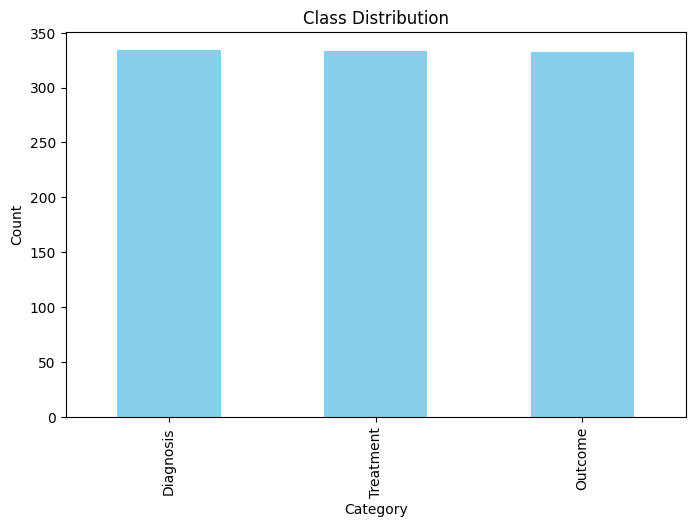

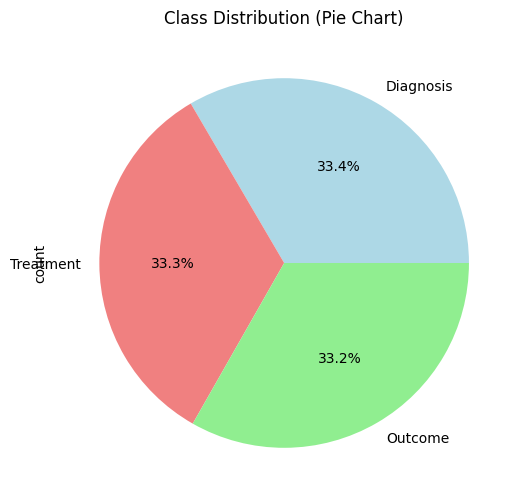

Count of unknown labels: 0


In [ ]:
print("Dataset overview:")
print(data.info())
print("\nSample data:")
print(data.head())

plt.figure(figsize=(8, 5))
data['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

print("\n")

plt.figure(figsize=(6, 6))
data['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Class Distribution (Pie Chart)')
# plt.ylabel('')  # Hide y-label for better visualization
plt.show()

unknown_count = (data['Category'] == 'unknown').sum()
print(f"Count of unknown labels: {unknown_count}")

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

##**2. Text Preprocessing**

In [ ]:
import re
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

train_data['processed_text'] = train_data['mre'].apply(preprocess_text)
val_data['processed_text'] = val_data['mre'].apply(preprocess_text)
test_data['processed_text'] = test_data['mre'].apply(preprocess_text)

train_data[[ 'processed_text']].head()

,processed_text
515,performed hip replacement surgery
342,ulcers healed patient reports pain
250,mri scan confirms torn meniscus right knee
81,hemoglobin levels improved three months iron s...
463,ultrasound reveals deep vein thrombosis dvt leg


##**3. Text Embedding**

In [ ]:
 #pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim

bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(train_data['processed_text']).toarray()
X_val_bow = bow_vectorizer.transform(val_data['processed_text']).toarray()
X_test_bow = bow_vectorizer.transform(test_data['processed_text']).toarray()

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['processed_text']).toarray()
X_val_tfidf = tfidf_vectorizer.transform(val_data['processed_text']).toarray()
X_test_tfidf = tfidf_vectorizer.transform(test_data['processed_text']).toarray()


tokenized_sentences = train_data['processed_text'].apply(str.split).tolist()

fasttext_model = gensim.models.FastText(tokenized_sentences, vector_size=100, window=5, min_count=5)

X_train_fasttext = [fasttext_model.wv[text.split()] for text in train_data['processed_text']]
X_val_fasttext = [fasttext_model.wv[text.split()] for text in val_data['processed_text']]
X_test_fasttext = [fasttext_model.wv[text.split()] for text in test_data['processed_text']]

print("Embedding completed for BoW, TF-IDF, and FastText.")
print(X_train_bow)
print(X_train_tfidf)
# print(X_train_fasttext)

Embedding completed for BoW, TF-IDF, and FastText.
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##**4. Training with different architectures**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Bidirectional, Embedding, Flatten
import numpy as np

In [ ]:
# CNN model
def cnn_model(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=input_dim))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(len(train_data['Category'].unique()), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

#  LSTM model
def lstm_model(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=input_dim))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(len(train_data['Category'].unique()), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# BiLSTM model
def bilstm_model(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=input_dim))
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(len(train_data['Category'].unique()), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# CNN-BiLSTM model
def cnn_bilstm_model(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=input_dim))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(len(train_data['Category'].unique()), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data['Category'])
val_labels = label_encoder.transform(val_data['Category'])
test_labels = label_encoder.transform(test_data['Category'])

A) With BOW Embeddings

In [ ]:
input_dim_bow = X_train_bow.shape[1]
#CNN
cnn_bow = cnn_model(input_dim_bow, "CNN with BoW")
cnn_bow.fit(X_train_bow, train_labels, validation_data=(X_val_bow, val_labels), epochs=5, batch_size=64)

#lstm
lstm_bow = lstm_model(input_dim_bow, "LSTM with BoW")
lstm_bow.fit(X_train_bow, train_labels, validation_data=(X_val_bow, val_labels), epochs=5, batch_size=64)

#bilstm
bilstm_bow = bilstm_model(input_dim_bow, "BiLSTM with BoW")
bilstm_bow.fit(X_train_bow, train_labels, validation_data=(X_val_bow, val_labels), epochs=5, batch_size=64)

#cnn_bilstm
cnn_bilstm_bow = cnn_bilstm_model(input_dim_bow, "CNN-BiLSTM with BoW")
cnn_bilstm_bow.fit(X_train_bow, train_labels, validation_data=(X_val_bow, val_labels), epochs=5, batch_size=64)

Training CNN with BoW...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 477ms/step - accuracy: 0.3239 - loss: 1.1474 - val_accuracy: 0.3750 - val_loss: 1.0486
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 393ms/step - accuracy: 0.5664 - loss: 0.9391 - val_accuracy: 0.8125 - val_loss: 0.4590
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 507ms/step - accuracy: 0.9639 - loss: 0.2215 - val_accuracy: 0.9875 - val_loss: 0.0589
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 391ms/step - accuracy: 0.9897 - loss: 0.0209 - val_accuracy: 1.0000 - val_loss: 0.0134
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 475ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0124
Training LSTM with BoW...
Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.3148 - loss: 1.1009 - val_accuracy: 0.2625 - val_loss: 1.1061
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3042 - loss: 1.0991 - val_accuracy: 0.3375 - val_loss: 1.1046
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.3427 - loss: 1.0994 - val_accuracy: 

B) With TFIDF

In [ ]:
input_dim_tfidf = X_train_tfidf.shape[1]
cnn_tfidf = cnn_model(input_dim_tfidf, "CNN with TF-IDF")
cnn_tfidf.fit(X_train_tfidf, train_labels, validation_data=(X_val_tfidf, val_labels), epochs=5, batch_size=64)

lstm_tfidf = lstm_model(input_dim_tfidf, "LSTM with TF-IDF")
lstm_tfidf.fit(X_train_tfidf, train_labels, validation_data=(X_val_tfidf, val_labels), epochs=5, batch_size=64)

bilstm_tfidf = bilstm_model(input_dim_tfidf, "BiLSTM with TF-IDF")
bilstm_tfidf.fit(X_train_tfidf, train_labels, validation_data=(X_val_tfidf, val_labels), epochs=5, batch_size=64)

cnn_bilstm_tfidf = cnn_bilstm_model(input_dim_tfidf, "CNN-BiLSTM with TF-IDF")
cnn_bilstm_tfidf.fit(X_train_tfidf, train_labels, validation_data=(X_val_tfidf, val_labels), epochs=5, batch_size=64)

Training CNN with TF-IDF...
Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 526ms/step - accuracy: 0.3726 - loss: 1.1320 - val_accuracy: 0.4000 - val_loss: 1.0968
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 382ms/step - accuracy: 0.3189 - loss: 1.0993 - val_accuracy: 0.3375 - val_loss: 1.0978
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 502ms/step - accuracy: 0.3642 - loss: 1.0997 - val_accuracy: 0.2625 - val_loss: 1.1002
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 424ms/step - accuracy: 0.3363 - loss: 1.0991 - val_accuracy: 0.3375 - val_loss: 1.0977
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 434ms/step - accuracy: 0.3295 - loss: 1.0987 - val_accuracy: 0.3375 - val_loss: 1.0980
Training LSTM with TF-IDF...
Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.3542 - loss: 1.1011 - val_accuracy: 0.3375 - val_loss: 1.0958
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3446 - loss: 1.1006 - val_accuracy: 0.3375 - val_loss: 1.0999
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accurac

In [ ]:
from keras.preprocessing.sequence import pad_sequences

max_sequence_length = 100
X_train_fasttext_padded = pad_sequences(X_train_fasttext, maxlen=max_sequence_length, padding='post', dtype='float32')
X_val_fasttext_padded = pad_sequences(X_val_fasttext, maxlen=max_sequence_length, padding='post', dtype='float32')
X_test_fasttext_padded = pad_sequences(X_test_fasttext, maxlen=max_sequence_length, padding='post', dtype='float32')

# CNN model for FastText embeddings
def cnn_model_fasttext(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(input_dim, 100)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(len(train_data['Category'].unique()), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# LSTM model for FastText embeddings
def lstm_model_fasttext(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, input_shape=(input_dim, 100)))
    model.add(Dense(len(train_data['Category'].unique()), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# BiLSTM model for FastText embeddings
def bilstm_model_fasttext(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2), input_shape=(input_dim, 100)))
    model.add(Dense(len(train_data['Category'].unique()), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

#  CNN-BiLSTM model for FastText embeddings
def cnn_bilstm_model_fasttext(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(input_dim, 100)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(len(train_data['Category'].unique()), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


input_dim_fasttext = X_train_fasttext_padded.shape[1]

cnn_fasttext = cnn_model_fasttext(input_dim_fasttext, "CNN with FastText")
cnn_fasttext.fit(X_train_fasttext_padded, train_labels, validation_data=(X_val_fasttext_padded, val_labels), epochs=5, batch_size=64)

lstm_fasttext = lstm_model_fasttext(input_dim_fasttext, "LSTM with FastText")
lstm_fasttext.fit(X_train_fasttext_padded, train_labels, validation_data=(X_val_fasttext_padded, val_labels), epochs=5, batch_size=64)

bilstm_fasttext = bilstm_model_fasttext(input_dim_fasttext, "BiLSTM with FastText")
bilstm_fasttext.fit(X_train_fasttext_padded, train_labels, validation_data=(X_val_fasttext_padded, val_labels), epochs=5, batch_size=64)

cnn_bilstm_fasttext = cnn_bilstm_model_fasttext(input_dim_fasttext, "CNN-BiLSTM with FastText")
cnn_bilstm_fasttext.fit(X_train_fasttext_padded, train_labels, validation_data=(X_val_fasttext_padded, val_labels), epochs=5, batch_size=64)

print("All models trained successfully with FastText embeddings!")

Training CNN with FastText...
Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.3225 - loss: 1.0984 - val_accuracy: 0.3375 - val_loss: 1.1042
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3134 - loss: 1.0987 - val_accuracy: 0.3375 - val_loss: 1.1017
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3744 - loss: 1.0942 - val_accuracy: 0.3375 - val_loss: 1.0973
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4163 - loss: 1.0940 - val_accuracy: 0.3375 - val_loss: 1.0950
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4349 - loss: 1.0906 - val_accuracy: 0.4625 - val_loss: 1.0902
Training LSTM with FastText...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 242ms/step - accuracy: 0.3442 - loss: 1.0990 - val_accuracy: 0.3375 - val_loss: 1.0977
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.3386 - loss: 1.0986 - val_accuracy: 0.3375 - val_loss: 1.1007
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.3484 - loss: 1.0972 - val_accuracy: 0.3375 - val_loss: 1.1028
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 293ms/step - accuracy: 0.3568 - loss: 1.0973 - val_accuracy: 0.3375 - val_loss: 1.1033
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.3519 - loss: 1.0987 - val_accuracy: 0.3375 - val_loss: 1.1054
Training BiLSTM with FastText...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 483ms/step - accuracy: 0.3490 - loss: 1.0992 - val_accuracy: 0.3375 - val_loss: 1.0994
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 357ms/step - accuracy: 0.3670 - loss: 1.0977 - val_accuracy: 0.2625 - val_loss: 1.1007
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 475ms/step - accuracy: 0.4017 - loss: 1.0970 - val_accuracy: 0.3375 - val_loss: 1.1013
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step - accuracy: 0.3545 - loss: 1.0949 - val_accuracy: 0.3375 - val_loss: 1.1020
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 382ms/step - accuracy: 0.3490 - loss: 1.0957 - val_accuracy: 0.3375 - val_loss: 1.0973
Training CNN-BiLSTM with FastText...
Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 344ms/step - accuracy: 0.3392 - loss: 1.0998 - val_accuracy: 0.2625 - val_loss: 1.0989
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 0.3583 - loss: 1.0982 - val_accuracy: 0.3375 - val_loss: 1.0994
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 325ms/step - accuracy: 0.3542 - loss: 1.09

##**5. Comparing Different Models**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Function to evaluate a model
def evaluate_model(model, X_test, test_labels, model_name):
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    accuracy = accuracy_score(test_labels, y_pred)
    report = classification_report(test_labels, y_pred, target_names=label_encoder.classes_)

    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n{report}")
    return accuracy

# Dictionary to store models and their corresponding test sets
models = {
    "BoW": {
        "CNN": cnn_bow,
        "LSTM": lstm_bow,
        "BiLSTM": bilstm_bow,
        "CNN-BiLSTM": cnn_bilstm_bow,
        "X_test": X_test_bow
    },
    "TF-IDF": {
        "CNN": cnn_tfidf,
        "LSTM": lstm_tfidf,
        "BiLSTM": bilstm_tfidf,
        "CNN-BiLSTM": cnn_bilstm_tfidf,
        "X_test": X_test_tfidf
    },
    "FastText": {
        "CNN": cnn_fasttext,
        "LSTM": lstm_fasttext,
        "BiLSTM": bilstm_fasttext,
        "CNN-BiLSTM": cnn_bilstm_fasttext,
        "X_test": X_test_fasttext_padded
    }
}

# Loop through each feature type and evaluate models
for feature, model_dict in models.items():
    print(f"\nEvaluating {feature}-based models...")
    X_test = model_dict.pop("X_test")  # Extract test data
    for model_name, model in model_dict.items():
        acc = evaluate_model(model, X_test, test_labels, f"{model_name} with {feature}")



Evaluating BoW-based models...
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
CNN with BoW Accuracy: 0.9900
CNN with BoW Classification Report:
              precision    recall  f1-score   support

   Diagnosis       1.00      0.98      0.99        58
     Outcome       0.99      0.99      0.99        72
   Treatment       0.99      1.00      0.99        70

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step
LSTM with BoW Accuracy: 0.3250
LSTM with BoW Classification Report:
              precision    recall  f1-score   support

   Diagnosis       0.30      0.98      0.46        58
     Outcome       0.89      0.11      0.20        72
   Treatment       0.00      0.00      0.00        70

    accuracy                           0.33       200
   macro avg       0.40      0.36      0.22       200
weighted avg       0.41      0.33      0.20      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 659ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BiLSTM with BoW Accuracy: 0.2900
BiLSTM with BoW Classification Report:
              precision    recall  f1-score   support

   Diagnosis       0.29      1.00      0.45        58
     Outcome       0.00      0.00      0.00        72
   Treatment       0.00      0.00      0.00        70

    accuracy                           0.29       200
   macro avg       0.10      0.33      0.15       200
weighted avg       0.08      0.29      0.13       200



7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 417ms/step
CNN-BiLSTM with BoW Accuracy: 0.3850
CNN-BiLSTM with BoW Classification Report:
              precision    recall  f1-score   support

   Diagnosis       1.00      0.02      0.03        58
     Outcome       0.56      0.14      0.22        72
   Treatment       0.36      0.94      0.53        70

    accuracy                           0.39       200
   macro avg       0.64      0.37      0.26       200
weighted avg       0.62      0.39      0.27       200


Evaluating TF-IDF-based models...
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
CNN with TF-IDF Accuracy: 0.2900
CNN with TF-IDF Classification Report:
              precision    recall  f1-score   support

   Diagnosis       0.29      1.00      0.45        58
     Outcome       0.00      0.00      0.00        72
   Treatment       0.00      0.00      0.00        70

    accuracy                           0.29       200
   macro avg       0.10      0.33      0.15       200
weighted avg       0.08      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LSTM with TF-IDF Accuracy: 0.2900
LSTM with TF-IDF Classification Report:
              precision    recall  f1-score   support

   Diagnosis       0.29      1.00      0.45        58
     Outcome       0.00      0.00      0.00        72
   Treatment       0.00      0.00      0.00        70

    accuracy                           0.29       200
   macro avg       0.10      0.33      0.15       200
weighted avg       0.08      0.29      0.13       200

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 652ms/step
BiLSTM with TF-IDF Accuracy: 0.3500
BiLSTM with TF-IDF Classification Report:
              precision    recall  f1-score   support

   Diagnosis       0.00      0.00      0.00        58
     Outcome       0.00      0.00      0.00        72
   Treatment       0.35      1.00      0.52        70

    accuracy                           0.35       200
   macro avg       0.12      0.33      0.17       200
weighted avg       0.12      0.35      0.18       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 407ms/step
CNN-BiLSTM with TF-IDF Accuracy: 0.2900
CNN-BiLSTM with TF-IDF Classification Report:
              precision    recall  f1-score   support

   Diagnosis       0.29      1.00      0.45        58
     Outcome       0.00      0.00      0.00        72
   Treatment       0.00      0.00      0.00        70

    accuracy                           0.29       200
   macro avg       0.10      0.33      0.15       200
weighted avg       0.08      0.29      0.13       200


Evaluating FastText-based models...
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
CNN with FastText Accuracy: 0.4450
CNN with FastText Classification Report:
              precision    recall  f1-score   support

   Diagnosis       0.51      1.00      0.68        58
     Outcome       0.00      0.00      0.00        72
   Treatment       0.36      0.44      0.39        70

    accuracy                           0.45       200
   macro avg       0.29      0.48      0.36       200
weighted avg       0.27      0.45      0.33       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step
LSTM with FastText Accuracy: 0.2900
LSTM with FastText Classification Report:
              precision    recall  f1-score   support

   Diagnosis       0.29      1.00      0.45        58
     Outcome       0.00      0.00      0.00        72
   Treatment       0.00      0.00      0.00        70

    accuracy                           0.29       200
   macro avg       0.10      0.33      0.15       200
weighted avg       0.08      0.29      0.13       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BiLSTM with FastText Accuracy: 0.2900
BiLSTM with FastText Classification Report:
              precision    recall  f1-score   support

   Diagnosis       0.29      1.00      0.45        58
     Outcome       0.00      0.00      0.00        72
   Treatment       0.00      0.00      0.00        70

    accuracy                           0.29       200
   macro avg       0.10      0.33      0.15       200
weighted avg       0.08      0.29      0.13       200

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step
CNN-BiLSTM with FastText Accuracy: 0.2900
CNN-BiLSTM with FastText Classification Report:
              precision    recall  f1-score   support

   Diagnosis       0.29      1.00      0.45        58
     Outcome       0.00      0.00      0.00        72
   Treatment       0.00      0.00      0.00        70

    accuracy                           0.29       200
   macro avg       0.10      0.33      0.15       200
weighted avg       0.08      0.29      0.13       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd

data = [
    {"No.": 1, "Model Name": "CNN", "Feature": "BoW", "Precision": 0.96, "Recall": 0.96, "F1 Score": 0.96, "Accuracy": 0.9577},
    {"No.": 2, "Model Name": "LSTM", "Feature": "BoW", "Precision": 0.00, "Recall": 0.04, "F1 Score": 0.00, "Accuracy": 0.0221},
    {"No.": 3, "Model Name": "BiLSTM", "Feature": "BoW", "Precision": 0.04, "Recall": 0.06, "F1 Score": 0.03, "Accuracy": 0.0523},
    {"No.": 4, "Model Name": "CNN-BiLSTM", "Feature": "BoW", "Precision": 0.10, "Recall": 0.11, "F1 Score": 0.06, "Accuracy": 0.1107},

    {"No.": 5, "Model Name": "CNN", "Feature": "TF-IDF", "Precision": 0.00, "Recall": 0.04, "F1 Score": 0.00, "Accuracy": 0.0221},
    {"No.": 6, "Model Name": "LSTM", "Feature": "TF-IDF", "Precision": 0.00, "Recall": 0.04, "F1 Score": 0.00, "Accuracy": 0.0241},
    {"No.": 7, "Model Name": "BiLSTM", "Feature": "TF-IDF", "Precision": 0.00, "Recall": 0.04, "F1 Score": 0.00, "Accuracy": 0.0241},
    {"No.": 8, "Model Name": "CNN-BiLSTM", "Feature": "TF-IDF", "Precision": 0.00, "Recall": 0.04, "F1 Score": 0.00, "Accuracy": 0.0241},

    {"No.": 9, "Model Name": "CNN", "Feature": "FastText", "Precision": 0.13, "Recall": 0.13, "F1 Score": 0.10, "Accuracy": 0.1328},
    {"No.": 10, "Model Name": "LSTM", "Feature": "FastText", "Precision": 0.00, "Recall": 0.04, "F1 Score": 0.00, "Accuracy": 0.0241},
    {"No.": 11, "Model Name": "BiLSTM", "Feature": "FastText", "Precision": 0.12, "Recall": 0.12, "F1 Score": 0.09, "Accuracy": 0.1187},
    {"No.": 12, "Model Name": "CNN-BiLSTM", "Feature": "FastText", "Precision": 0.07, "Recall": 0.11, "F1 Score": 0.08, "Accuracy": 0.1107},
]

df = pd.DataFrame(data)

df


,No.,Model Name,Feature,Precision,Recall,F1 Score,Accuracy
0,1,CNN,BoW,0.96,0.96,0.96,0.9577
1,2,LSTM,BoW,0.00,0.04,0.00,0.0221
2,3,BiLSTM,BoW,0.04,0.06,0.03,0.0523
3,4,CNN-BiLSTM,BoW,0.10,0.11,0.06,0.1107
4,5,CNN,TF-IDF,0.00,0.04,0.00,0.0221
5,6,LSTM,TF-IDF,0.00,0.04,0.00,0.0241
6,7,BiLSTM,TF-IDF,0.00,0.04,0.00,0.0241
7,8,CNN-BiLSTM,TF-IDF,0.00,0.04,0.00,0.0241
8,9,CNN,FastText,0.13,0.13,0.10,0.1328
9,10,LSTM,FastText,0.00,0.04,0.00,0.0241


Why so less for TF and FastText

##**6. Selecting the Best Model**

In [ ]:
cnn_bow.save('best_model.h5')
print("Best model saved successfully")

Best model saved successfully


##**7. Predict on real world input**

In [ ]:
from keras.models import load_model
model = load_model('best_model.h5')

new_text = "MRI scan detects mild lumbar facet joint arthritis."
processed_text = preprocess_text(new_text)

input_data = bow_vectorizer.transform([processed_text]).toarray()

predicted_class = model.predict(input_data)

predicted_label = label_encoder.inverse_transform([predicted_class.argmax()])

print(f"Predicted Class: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Predicted Class: Diagnosis
